In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
base = "CME"
threshold = 3.5

In [3]:
Comparison = pd.read_csv(f"{base} Base output/Comparison.csv")

if base == "CME":
    sec = "Dino"
if base == "Dino":
    sec = "CME"

In [4]:
M_comp = Comparison.to_numpy()
ID_vec = defaultdict(list)

for ID in M_comp:
    ID_vec[ID[0]].append(ID)

for ID_val in ID_vec:
    ID_vec[ID_val] = np.array(ID_vec[ID_val]) 

ID_list = np.zeros((len(ID_vec),6), dtype=object)

In [5]:
for i, ID in enumerate(ID_vec):
    ID_val = ID_vec[ID]
    x_ID = np.unique(ID_val[:,0])
    y_IDs = np.unique(ID_val[:,1])
    TL_x = np.unique(ID_val[:,13])
    TL_y = np.unique(ID_val[:,14])

    ID_list[i][0] = x_ID
    ID_list[i][1] = y_IDs
    ID_list[i][2] = TL_x
    ID_list[i][3] = TL_y
    
    if np.all(ID_val[:,15]) < threshold:
        ID_list[i][4] = True
    else:
        ID_list[i][4] = False

    if len(y_IDs) == 1 and TL_x == TL_y:
        ID_list[i][5] = True
    else:
        ID_list[i][5] = False

In [6]:
Match = pd.DataFrame(ID_list, columns = [f"ID ({base})",f"ID ({sec})", f"Track Length ({base})", f"Track Length ({sec})", "Match", "Identical Match"])
Match.to_csv(f"{base} Base Output/Matches.csv", index = False)

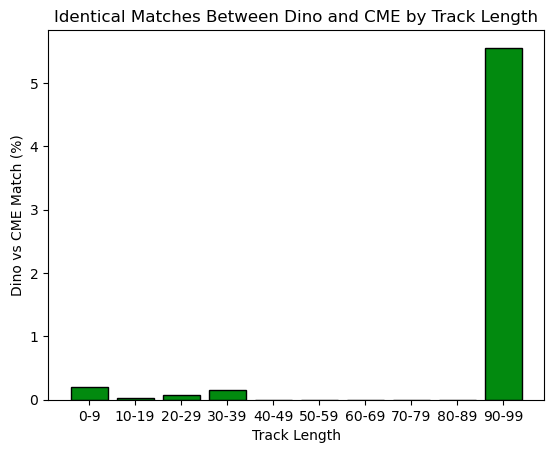

<Figure size 640x480 with 0 Axes>

In [7]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[5] for row in ID_list])
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))

plt.bar(labels,100*counts_true/counts, color = "#028A0F", edgecolor = "black")
plt.xlabel("Track Length")
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"Identical Matches Between {base} and {sec} by Track Length")
plt.show()
plt.savefig(f"{base} Base Plots/{base} vs {sec} identical matches.png")

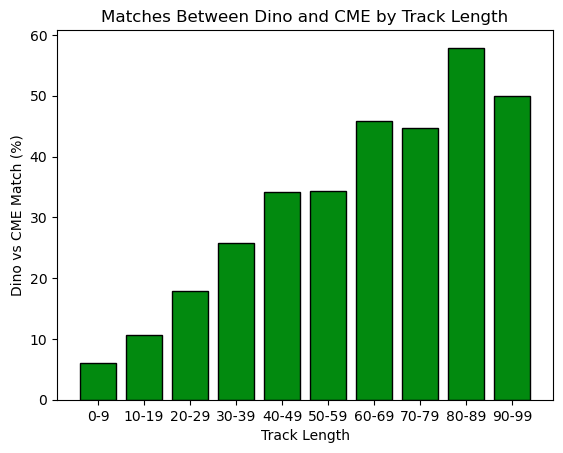

<Figure size 640x480 with 0 Axes>

In [8]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[4] for row in ID_list])
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))

plt.bar(labels,100*counts_true/counts, color = "#028A0F", edgecolor = "black")
plt.xlabel("Track Length")
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"Matches Between {base} and {sec} by Track Length")
plt.show()
plt.savefig(f"{base} Base Plots/{base} vs {sec} matches")

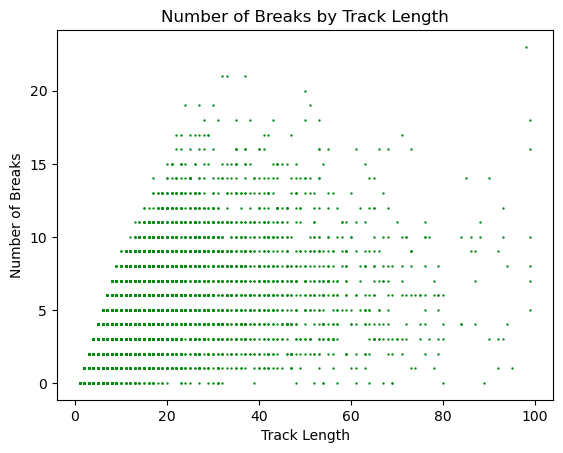

<Figure size 640x480 with 0 Axes>

In [9]:
selected = ID_list[ID_list[:, 4] == False]
breaks = np.array([len(x) for x in selected[:,1]])-1
plt.scatter(selected[:,2],breaks, s = 0.5, color = "#028A0F") 
plt.xlabel("Track Length")
plt.ylabel("Number of Breaks")
plt.title("Number of Breaks by Track Length")
plt.show()
plt.savefig(f"{base} Base Plots/Break by Track Length.png")